# Metric Learning

The goal of **metric learning** is to adjust a pairwise distance metric, such as the **Mahalanobis distance** $ d_\mathbf{M}(x, y) = \sqrt{(x-y)^T \mathbf{M} (x-y)} $, to better suit the specific problem based on training examples.

**Types of Constraints in Metric Learning**

Metric learning methods typically rely on **side information** presented in the form of constraints such as:

- **Must-link / Cannot-link Constraints**:
   - **Must-link (Positive Pairs)**: These are pairs of examples $ (x_i, x_j) $ that should be similar. For instance, in a facial recognition task, different images of the same person would be considered a must-link pair.
   - **Cannot-link (Negative Pairs)**: These are pairs of examples $ (x_i, x_j) $ that should be dissimilar, such as images of different people in the facial recognition task.

   Formally, these constraints are denoted as:
   - $ S = \{(x_i, x_j) \mid x_i \text{ and } x_j \text{ should be similar}\} $
   - $ D = \{(x_i, x_j) \mid x_i \text{ and } x_j \text{ should be dissimilar}\} $

- **Relative Constraints (Training Triplets)**:
   - These involve triplets $ (x_i, x_j, x_k) $ where $ x_i $ should be more similar to $ x_j $ than to $ x_k $. 
   Formally:
   - $ R = \{(x_i, x_j, x_k) \mid x_i \text{ should be more similar to } x_j \text{ than to } x_k\} $

### The Objective of Metric Learning

A metric learning algorithm aims to find the parameters of the metric (in the case of the Mahalanobis distance, this means learning the matrix $ \mathbf{M} $) so that the metric best aligns with the provided constraints. 

### Visualizing Metric Learning

Imagine a situation where we're trying to cluster images based on their content. Initially, the distance metric might not distinguish well between similar and dissimilar images. After metric learning, however, the learned metric should ensure that images of the same object are clustered together, while images of different objects are farther apart. 

![Metric_L_first](../MetricLearning/MetricLearningImages/MetricLearningWhatdo.JPG)



## Metrics for Numerical Data

For data points in a vector space $ X \subset \mathbb{R}^d $, the following distance metrics are commonly used:

- **Minkowski Distances:** 

Minkowski distances are defined by the $ L_p $ norms:

$$
d_p(x, x_0) = \left( \sum_{i=1}^d |x_i - x_{0i}|^p \right)^{1/p}
$$

![Minkowski_distance](../MetricLearning/MetricLearningImages/Minkowski_d_1.JPG)

For specific values of $ p $:

- **Manhattan Distance (p=1):** 

$$
d_{\text{man}}(x, x_0) = \sum_{i=1}^d |x_i - x_{0i}|
$$

- **Euclidean Distance (p=2):** 

$$
d_{\text{euc}}(x, x_0) = \sqrt{\sum_{i=1}^d (x_i - x_{0i})^2}
$$

- **Chebyshev Distance (p \to \infty):** 

$$
d_{\text{che}}(x, x_0) = \max_{i} |x_i - x_{0i}|
$$

- **Mahalanobis Distance:**

The Mahalanobis distance accounts for feature correlations:

$$
d_M(x, x_0) = \sqrt{(x - x_0)^\top \Sigma^{-1} (x - x_0)}
$$

Where $ \Sigma $ is the covariance matrix of the data. In metric learning, it is often generalized as:

$$
d_{\text{gen}}(x, x_0) = \sqrt{(x - x_0)^\top M (x - x_0)}
$$

where $ M $ is a positive semi-definite matrix. When $ M $ is the identity matrix, it reduces to the Euclidean distance. This distance allows for data projections into lower dimensions.

- **Cosine Similarity:**

Cosine similarity measures the cosine of the angle between vectors:

$$
s_\text{cos}(x, x_0) = \frac{x^\top x_0}{\|x\|_2 \|x_0\|_2}
$$



## Mahalanobis Distance Learning

Mahalanobis distance learning focuses on adapting the Mahalanobis distance, which is defined as:

$$
d(x, x_0) = \sqrt{(x - x_0)^\top \Sigma^{-1} (x - x_0)}
$$

where $ \Sigma $ is the covariance matrix of the data. In practice, the squared form is often used:

$$ d^2(x, x_0) = (x - x_0)^\top \Sigma^{-1} (x - x_0) $$

The goal is to learn the matrix $ \Sigma $ from the training data, where $ \Sigma $ must remain positive semi-definite (PSD) during optimization.

**Key Approaches:**

1. **MMC (Xing et al., 2002):**
   - **Objective:** Learn a Mahalanobis distance for clustering based on similar and dissimilar pairs.
   - **Formulation:** 
$$
\begin{aligned}
\max_{M \in \mathcal{S}_d^+} \quad \sum_{(x_i, x_j) \in D} d^2(x_i, x_j) \\
\text{subject to} \\
&\sum_{(x_i, x_j) \in S} d^2(x_i, x_j) \le 1 \\
\end{aligned}
$$

$$
\mathcal{S}_d^+ = \{ M \in \mathbb{R}^{d \times d} \mid M \text{ is symmetric and } M \succeq 0 \}
$$
   - **Method:** Uses a projected gradient descent algorithm, with projections onto the PSD cone.
   - **Complexity:** The PSD projection requires $ O(d^3) $ time, making it inefficient for large $ d $.

2. **NCA ( neighborhood Component Analysis) (Goldberger et al., 2004):**
   - **Objective:** Optimize the expected leave-one-out error ($ p_{ii}=0)for a stochastic ***nearest neighbor classifier*** in the projection space.
   - **Probability Definition:**

$$
p_{ij} = \frac{\exp(-\|x_i - x_j\|_M^2 / \tau)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|_M^2 / \tau)}
$$

 and $p_{ii}=0$

$$
\begin{aligned}
\|x_i - x_j\|_M^2 \\
& =(x_i-x_j)^{T}M(x_i-x_j)\\
& =(x_i-x_j)^{T}L^{T}L(x_i-x_j)\\
& =(Lx_i-Lx_j)^{T}(Lx_i-Lx_j)
\end{aligned}
$$

$$
p_{ij} = \frac{\exp(-\|Lx_i - Lx_j\|^2 / \tau)}{\sum_{k \neq i} \exp(-\|Lx_i - Lx_k\|^2 / \tau)}
$$
and $p_{ii}=0$

- **Probability $ x_i $ correctly classified:** 

$$
p_i = \sum_{j: y_j = y_i} p_{ij} $$

The Mahalanobis distance is learned by maximizing the sum of probabilities:

$$
\max_L \sum_{i=1}^n  p_i
$$

The problem is solved using **_gradient descent_**, but the formulation is nonconvex, which can lead to _local optima_.


## NCA Defect

NCA primarily aims to improve the performance of k-nearest neighbors (k-NN) by learning a Mahalanobis distance that increases the probability of correctly classifying data points. _However_, its effectiveness can be limited by the **non-linearity** of the data, especially in cases like the "_two moons_" dataset.

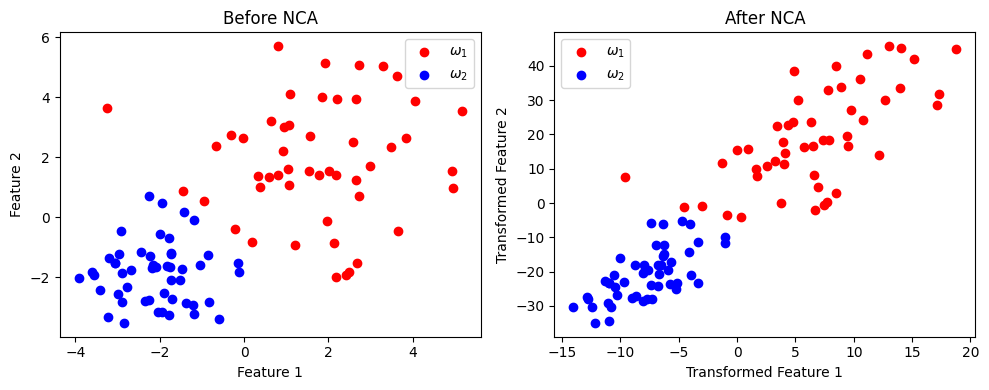

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from metric_learn import NCA
from sklearn.datasets import make_classification

# Step 1: Create a synthetic dataset with 2 classes
np.random.seed(42)
class_1 = 2*np.random.randn(50, 2) + np.array([2, 2])  # Class ω1 centered at (2, 2)
class_2 = np.random.randn(50, 2) + np.array([-2, -2])  # Class ω2 centered at (-2, -2)

X = np.vstack((class_1, class_2))
Y = np.hstack((np.zeros(50), np.ones(50)))  # Labels: 0 for ω1, 1 for ω2

# Step 2: Apply NCA
nca = NCA(max_iter=1000)
X_nca = nca.fit_transform(X, Y)

# Step 3: Visualization
plt.figure(figsize=(10, 4))

# Before NCA
plt.subplot(1, 2, 1)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("Before NCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# After NCA
plt.subplot(1, 2, 2)
plt.scatter(X_nca[Y == 0, 0], X_nca[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X_nca[Y == 1, 0], X_nca[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("After NCA")
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


## Homework : set parameter of NCA such as $ \tau $

## Large Margin Nearest Neighbor (LMNN) 

it is another popular metric learning algorithm that aims to improve the k-Nearest Neighbors (k-NN) classification by learning a Mahalanobis distance metric. The goal of LMNN is to ensure that: 
- Target neighbors (points of the same class) are close to each other in the transformed space.
- Impostors (points from different classes) are pushed further apart by a large margin.

LMNN popularity is from **the way the training constraints** are defined, particularly in the context of k-NN classification. For each training instance ($ x $ ), the k nearest neighbors of the same class (referred to as "target neighbors") are required to be closer than instances from other classes (referred to as "impostors").

![NCA_Figure](../MetricLearning/MetricLearningImages/NCA_Figure.JPG)

Formally, the constraints are defined as:

$$
\begin{equation}
\begin{aligned}
S_{\text{lmnn}} &= \{(i, j) : y_i = y_j \text{ and } j \text{ belongs to the } k\text{-neighborhood of } i\} \\
R_{\text{lmnn}} &= \{(i, j, k) : (i, j) \in S \text{ and } y_i \neq y_k\}
\end{aligned}
\end{equation}
$$

$ S $ is set of neighbor of $i$

The distance is learned using the following convex program:

$$
\min_{L} \sum_{(i,j) \in S_{\text{lmnn}}} \|L(x_i - x_j)\|^2 + \lambda \sum_{(i,j,k) \in R_{\text{lmnn}}} \left[1 + \|L(x_i - x_j)\|^2 - \|L(x_i - x_k)\|^2 \right]_+
$$

where $ \lambda \in [0,1] $ controls the trade-off between pulling target neighbors closer together and pushing away impostors.

Although the number of constraints in this problem grows quickly with the number of data points $n$, many constraints are often trivially satisfied. 

### Soft version of LMNN

The distance is then learned using the following convex program:

$$
\min_{\mathcal{S}_d^+,\xi}  (1-\lambda) \sum_{(x_i, x_j) \in S_{\text{lmnn}}} d_M^2(x_i, x_j) + \lambda \sum_{(x_i,x_j,x_k) \in R_{\text{lmnn}}} \xi_{ijk}
$$

subject to:

$$
d_M^2(i, k) - d_M^2(i, j) \geq 1 - \xi_{ijk}, \quad \forall (i, j, k) \in R_{\text{lmnn}}
$$

$$
\xi_{ijk} \geq 0, \quad \forall (i, j, k) \in R_{\text{lmnn}}
$$

where $\xi_{ijk} \geq 0$ and $ \lambda \in [0,1]$ controls the trade-off between pulling target neighbors closer together and pushing away impostors.


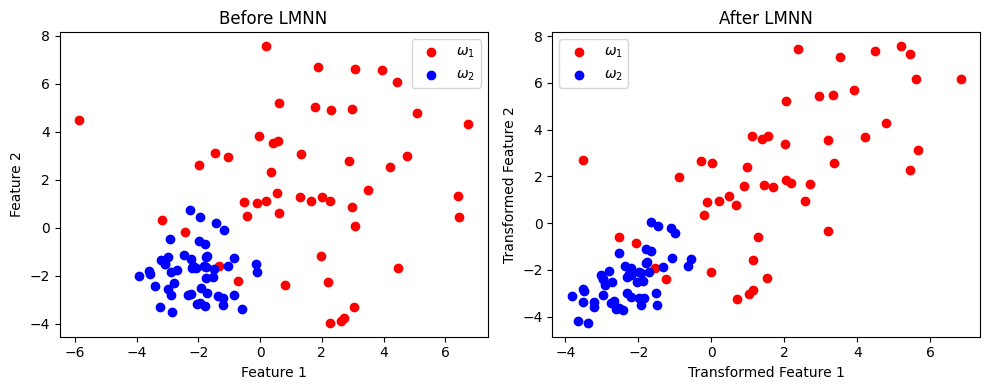

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from metric_learn import LMNN
from sklearn.datasets import make_classification

# Step 1: Create a synthetic dataset with 2 classes
np.random.seed(42)
class_1 = 3*np.random.randn(50, 2) + np.array([2, 2])  # Class ω1 centered at (2, 2)
class_2 = np.random.randn(50, 2) + np.array([-2, -2])  # Class ω2 centered at (-2, -2)

X = np.vstack((class_1, class_2))
Y = np.hstack((np.zeros(50), np.ones(50)))  # Labels: 0 for ω1, 1 for ω2

# Step 2: Apply LMNN
lmnn = LMNN(n_neighbors=1, learn_rate=1e-6)
X_lmnn = lmnn.fit_transform(X, Y)

# Step 3: Visualization
plt.figure(figsize=(10, 4))

# Before LMNN
plt.subplot(1, 2, 1)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("Before LMNN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# After LMNN
plt.subplot(1, 2, 2)
plt.scatter(X_lmnn[Y == 0, 0], X_lmnn[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X_lmnn[Y == 1, 0], X_lmnn[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("After LMNN")
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


### Noise Handling Strategy

In the above example, we can address this by adjusting the value of $ k $.

## Miniproject: ITML (Davis et al.) Information-eoretic Metric Learning (ITML)
- expalin and correct following text
- present to classroom

## Miniproject: change divergence into ITML

We quantify the measure of "closeness" between two distribution function with equal means and covariance of $ A^{-1} $ and $ A_0^{-1} $.

Given a distribution function parameterized by $ A $, the corresponding multivariate Gaussian distribution is:

$$
p(x; A) = \frac{1}{Z} \exp \left(-\frac{1}{2} d_A(x, \mu) \right)
$$

where $ Z $ is a normalizing constant and $ A^{-1} $ is the covariance of the distribution. The distance between two distribution function parameterized by $ A $ and $ A_0 $ is measured by the (differential) relative entropy between their corresponding Gaussians:

$$
KL(p(x; A_0) \| p(x; A)) = \int p(x; A_0) \log \frac{p(x; A_0)}{p(x; A} \, dx
$$

This measure provides a well-founded quantification of "closeness" between two probability density functions.

Given pairs of similar points $ S $ and dissimilar points $ D $, the distance metric learning problem is formulated as:

$$
\min_{A} KL(p(x; A_0) \| p(x; A))
$$

subject to:

$$
d_A(x_i, x_j) \leq u \quad \text{for } (i, j) \in S
$$

$$
d_A(x_i, x_j) \geq \ell \quad \text{for } (i, j) \in D
$$


###  Algorithm of ITML

We demonstrate that our information-theoretic objective for metric learning can be expressed using a specific type of Bregman divergence, enabling us to apply Bregman’s method for solving the metric learning problem. We also show an equivalence to a recent low-rank kernel learning problem, allowing for kernelization of the algorithm.

#### Metric Learning as LogDet Optimization

The LogDet divergence is a Bregman matrix divergence generated by the convex function $\phi(X) = - \log \det X$ defined over the cone of positive-definite matrices. For $n \times n$ matrices $A$ and $A'$, it is given by:

$$
D_{\ell d}(A, A') = \text{tr}(AA'^{-1}) - \log \det(AA'^{-1}) - n
$$

The differential relative entropy between two multivariate Gaussians can be expressed as a combination of a Mahalanobis distance between mean vectors and the LogDet divergence between covariance matrices:

$$
KL(p(x; A') \| p(x; A)) = \frac{1}{2} D_{\ell d}(A^{-1}, A^{-1})
= \frac{1}{2} D_{\ell d}(A, A')
$$

The LogDet divergence, also known as Stein’s loss, is invariant under scaling and invertible linear transformations:

$$
D_{\ell d}(S^T A S, S^T B S) = D_{\ell d}(A, B)
$$

Using this equivalence, we can reframe the distance metric learning problem as a LogDet optimization problem:

$$
\min_{A \succeq 0} D_{\ell d}(A, A') 
$$

subject to:

$$
\text{tr}(A(x_i - x_j)(x_i - x_j)^T) \leq \xi_{c(i,j)} \quad \text{for } (i, j) \in S
$$

$$
\text{tr}(A(x_i - x_j)(x_i - x_j)^T) \geq \xi_{c(i,j)} \quad \text{for } (i, j) \in D
$$

To address the possibility of infeasible solutions, slack variables $\xi$ are introduced:

$$
\min_{A \succeq 0, \xi} D_{\ell d}(A, A') + \gamma \cdot D_{\ell d}(\text{diag}(\xi), \text{diag}(\xi_0))
$$

subject to:

$$
\text{tr}(A(x_i - x_j)(x_i - x_j)^T) \leq \xi_{c(i,j)} \quad \text{for } (i, j) \in S
$$

$$
\text{tr}(A(x_i - x_j)(x_i - x_j)^T) \geq \xi_{c(i,j)} \quad \text{for } (i, j) \in D
$$

Here, $\gamma$ controls the trade-off between constraint satisfaction and minimizing $D_{\ell d}(A, A')$.

To solve this optimization problem, we extend methods from low-rank kernel learning, which involves Bregman projections:

$$
A^{t+1} = A^t + \beta A^t(x_i - x_j)(x_i - x_j)^T A^t
$$

where $x_i$ and $x_j$ are constrained data points, and $\beta$ is the projection parameter. Each projection operation costs $O(d^2)$, making a single iteration $O(cd^2)$. The algorithm avoids eigen-decomposition, and projections can be efficiently computed over a factorization $W$ of $A$, where $A = W^T W$.


### Algorithm: Information-Theoretic Metric Learning

**Input:**
- $ X $: Input $ d \times n $ matrix
- $ S $: Set of similar pairs
- $ D $: Set of dissimilar pairs
- $ u $, $ \ell $: Distance thresholds
- $ A_0 $: Input Mahalanobis matrix
- $ \gamma $: Slack parameter
- $ c $: Constraint index function

**Output:**
- $ A $: Output Mahalanobis matrix

**Procedure:**

1. Initialize:
   - $ A \leftarrow A_0 $
   - $ \lambda_{ij} \leftarrow 0 $ for all $ i, j $
   - Set $ \xi_{c(i,j)} \leftarrow u $ for $ (i, j) \in S $; otherwise, set $ \xi_{c(i,j)} \leftarrow \ell $

2. **Repeat until convergence:**
   1. Pick a constraint $ (i, j) \in S $ or $ (i, j) \in D $
   2. Compute $ p \leftarrow (x_i - x_j)^T A (x_i - x_j) $
   3. Set $ \delta \leftarrow 1 $ if $ (i, j) \in S $; otherwise, set $ \delta \leftarrow -1 $
   4. Compute:
      $$
      \alpha \leftarrow \min \left( \lambda_{ij}, \frac{\delta}{2} \left( \frac{1}{p} - \frac{\gamma}{\xi_{c(i,j)}} \right) \right)
      $$
   5. Compute:
      $$
      \beta \leftarrow \frac{\delta \alpha}{1 - \delta \alpha p}
      $$
   6. Update:
      $$
      \xi_{c(i,j)} \leftarrow \frac{\gamma \xi_{c(i,j)}}{\gamma + \delta \alpha \xi_{c(i,j)}}
      $$
   7. Update:
      $$
      \lambda_{ij} \leftarrow \lambda_{ij} - \alpha
      $$
   8. Update:
      $$
      A \leftarrow A + \beta A (x_i - x_j) (x_i - x_j)^T A
      $$

3. **Return:**
   - $ A $

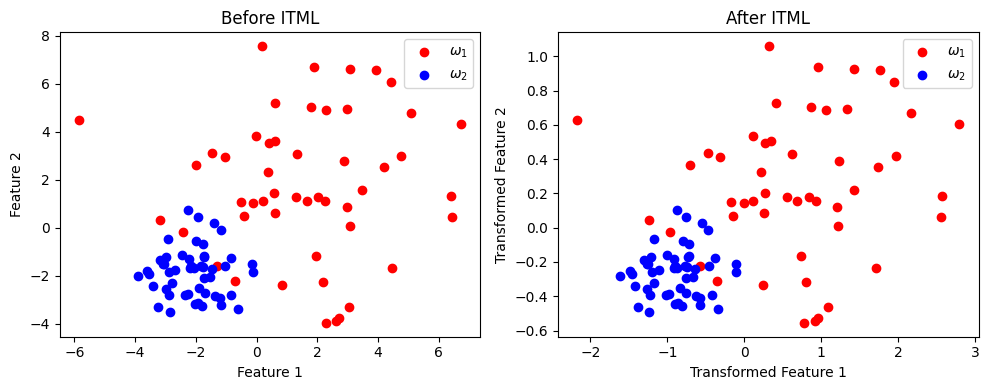

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from metric_learn import ITML_Supervised
from sklearn.datasets import make_classification

# Step 1: Create a synthetic dataset with 2 classes
np.random.seed(42)
class_1 = 3 * np.random.randn(50, 2) + np.array([2, 2])  # Class ω1 centered at (2, 2)
class_2 = np.random.randn(50, 2) + np.array([-2, -2])  # Class ω2 centered at (-2, -2)

X = np.vstack((class_1, class_2))
Y = np.hstack((np.zeros(50), np.ones(50)))  # Labels: 0 for ω1, 1 for ω2

# Step 2: Apply ITML_Supervised
itml = ITML_Supervised()
X_itml = itml.fit_transform(X, Y)

# Step 3: Visualization
plt.figure(figsize=(10, 4))

# Before ITML
plt.subplot(1, 2, 1)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("Before ITML")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# After ITML
plt.subplot(1, 2, 2)
plt.scatter(X_itml[Y == 0, 0], X_itml[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X_itml[Y == 1, 0], X_itml[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("After ITML")
plt.xlabel("Transformed Feature 1")
plt.ylabel("Transformed Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


## Miniproject: Nonlinear Metric Learning 
- introducing AE based joint with  Multidimensional Scaling (MDS) method
- code with suitable Lib


## Homework: Course Discussion on the Following Code
Isomap is applied to reduce the dimensionality of the dataset while capturing nonlinear relationships.

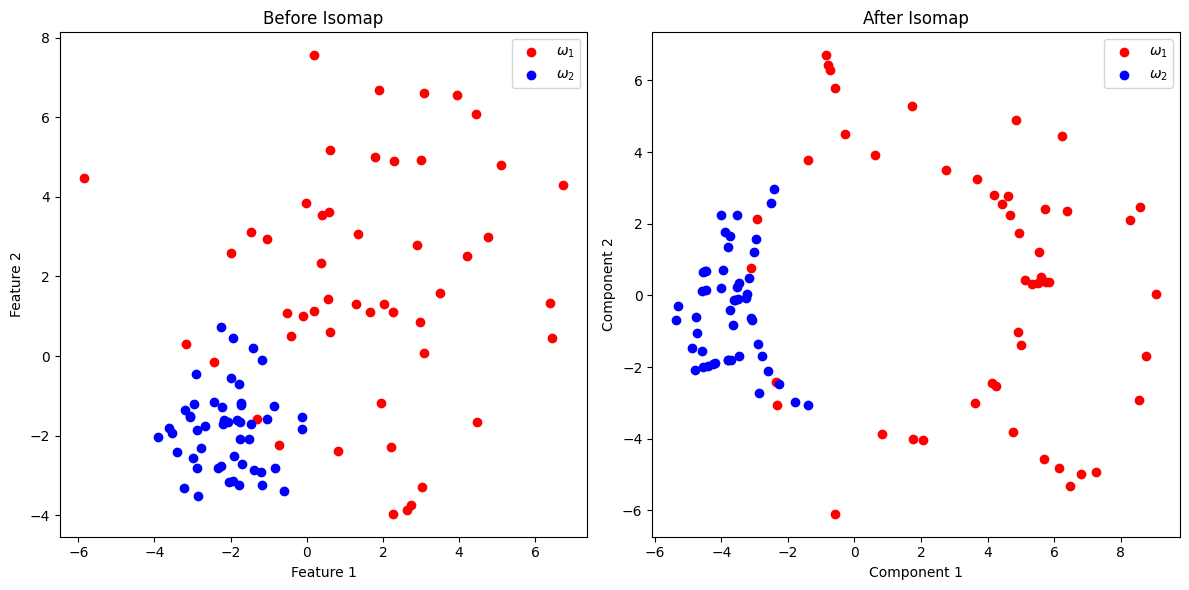

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.datasets import make_classification

# Step 1: Create a synthetic dataset with 2 classes
np.random.seed(42)
class_1 = 3 * np.random.randn(50, 2) + np.array([2, 2])  # Class ω1 centered at (2, 2)
class_2 = np.random.randn(50, 2) + np.array([-2, -2])  # Class ω2 centered at (-2, -2)

X = np.vstack((class_1, class_2))
Y = np.hstack((np.zeros(50), np.ones(50)))  # Labels: 0 for ω1, 1 for ω2

# Step 2: Apply Isomap for nonlinear dimensionality reduction
isomap = manifold.Isomap(n_neighbors=3, n_components=2)
X_isomap = isomap.fit_transform(X)

# Visualization
plt.figure(figsize=(12, 6))

# Before Isomap
plt.subplot(1, 2, 1)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("Before Isomap")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# After Isomap
plt.subplot(1, 2, 2)
plt.scatter(X_isomap[Y == 0, 0], X_isomap[Y == 0, 1], color='r', label=r'$\omega_1$')
plt.scatter(X_isomap[Y == 1, 0], X_isomap[Y == 1, 1], color='b', label=r'$\omega_2$')
plt.title("After Isomap")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()

plt.tight_layout()
plt.show()


## Miniproject: Metric Learning by Contrastive loss

Metric Learning aims to map objects into an embedded space where distances reflect their similarities, with **contrastive loss** specifically ensuring that similar objects are close and dissimilar ones are farther apart by maintaining a margin. Additionally, triplet loss ensures that an anchor sample is closer to positive samples than to negative ones.

**Some useful link** 

[Digging Deeper into Metric Learning with Loss Functions](https://towardsdatascience.com/metric-learning-loss-functions-5b67b3da99a5)


[Metric Learning](https://paperswithcode.com/task/metric-learning#task-libraries)

[Center Contrastive Loss for Metric Learning](https://arxiv.org/pdf/2308.00458)

**Useful References**

1. **Metric Learning**
   - **Aurélien Bellet**, Télécom ParisTech
   - **Amaury Habrard**, Université de Saint-Étienne
   - **Marc Sebban**, Université de Saint-Étienne

2. **Metric Learning: A Survey**
   - **Brian Kulis**

